# Titanic EDA

Compétition kaggle https://www.kaggle.com/c/titanic

La partie sur la régression logistique est inspirée des travaux suivants : [mnassrib](https://www.kaggle.com/code/mnassrib/titanic-logistic-regression-with-python) et [SarahG](https://www.kaggle.com/sgus1318/titanic-analysis-learning-to-swim-with-python).

## 1. Import python packages and load data

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
import matplotlib
plt.style.use('ggplot')
import re

%matplotlib inline
matplotlib.rcParams['figure.figsize'] = (12,3)

In [4]:
# from google.colab import drive
# drive.mount('/content/gdrive')

data_train = pd.read_csv("data/train.csv")
display(data_train.head())

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,Braund; Mr. Owen Harris,male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,Cumings; Mrs. John Bradley (Florence Briggs Th...,female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,Heikkinen; Miss. Laina,female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,Futrelle; Mrs. Jacques Heath (Lily May Peel),female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,Allen; Mr. William Henry,male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
data_train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


## 2. Nettoyage des données

In [6]:
# Vérification des données manquantes pour les variables nominales
data_train.loc[:,data_train.dtypes == object].apply(lambda x: sum(x == ''), axis=0)
# data_train.loc[:,data_train.dtypes == object].replace('', np.nan)

Name        0
Sex         0
Ticket      0
Cabin       0
Embarked    0
dtype: int64

In [7]:
# Pourcentage de valeurs manquantes par variable (méthode isnull ou isna)
data_train.apply(lambda x: x.isnull().mean(), axis=0)
# data_train.isnull().mean()

PassengerId    0.000000
Survived       0.000000
Pclass         0.000000
Name           0.000000
Sex            0.000000
Age            0.198653
SibSp          0.000000
Parch          0.000000
Ticket         0.000000
Fare           0.000000
Cabin          0.771044
Embarked       0.002245
dtype: float64

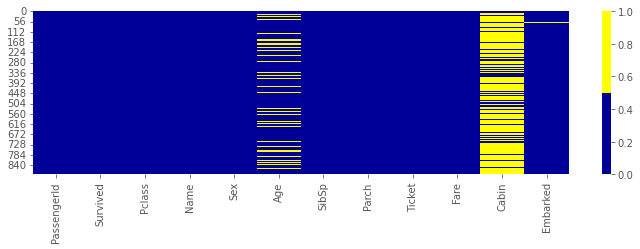

In [8]:
# Afficher le heatmap des valeurs manquantes
# Specify the colours: blue for not missing values, yellow for missing values.
colours = ['#000099', '#ffff00'] 
sns.heatmap(data_train.isnull(), cmap=sns.color_palette(colours))
plt.show()

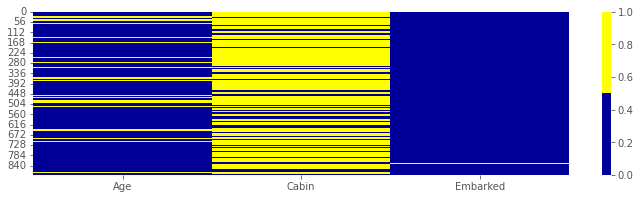

In [9]:
# Afficher le heatmap des valeurs manquantes: uniquement les colonnes où il y a au moins 1 NaN
cols_missing = data_train.columns[data_train.isnull().any()]
# data_train.columns[data_train.apply(lambda x: sum(x.isnull()), axis=0) > 0]
colours = ['#000099', '#ffff00'] # specify the colours: blue for not missing values, yellow for missing values.
sns.heatmap(data_train[cols_missing].isnull(), cmap=sns.color_palette(colours))
plt.show()

### 2.1 Visualizations d'exploration

**Devoir 1**. Trouvez des colonnes inutiles et supprimez les. 

In [10]:
data_train.nunique()

PassengerId    891
Survived         2
Pclass           3
Name           891
Sex              3
Age             88
SibSp            7
Parch            7
Ticket         681
Fare           248
Cabin          147
Embarked         3
dtype: int64

In [11]:
data_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,Braund; Mr. Owen Harris,male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,Cumings; Mrs. John Bradley (Florence Briggs Th...,female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,Heikkinen; Miss. Laina,female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,Futrelle; Mrs. Jacques Heath (Lily May Peel),female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,Allen; Mr. William Henry,male,35.0,0,0,373450,8.0500,NaN,S


In [12]:
data_train.drop(['PassengerId'], axis=1, inplace=True)

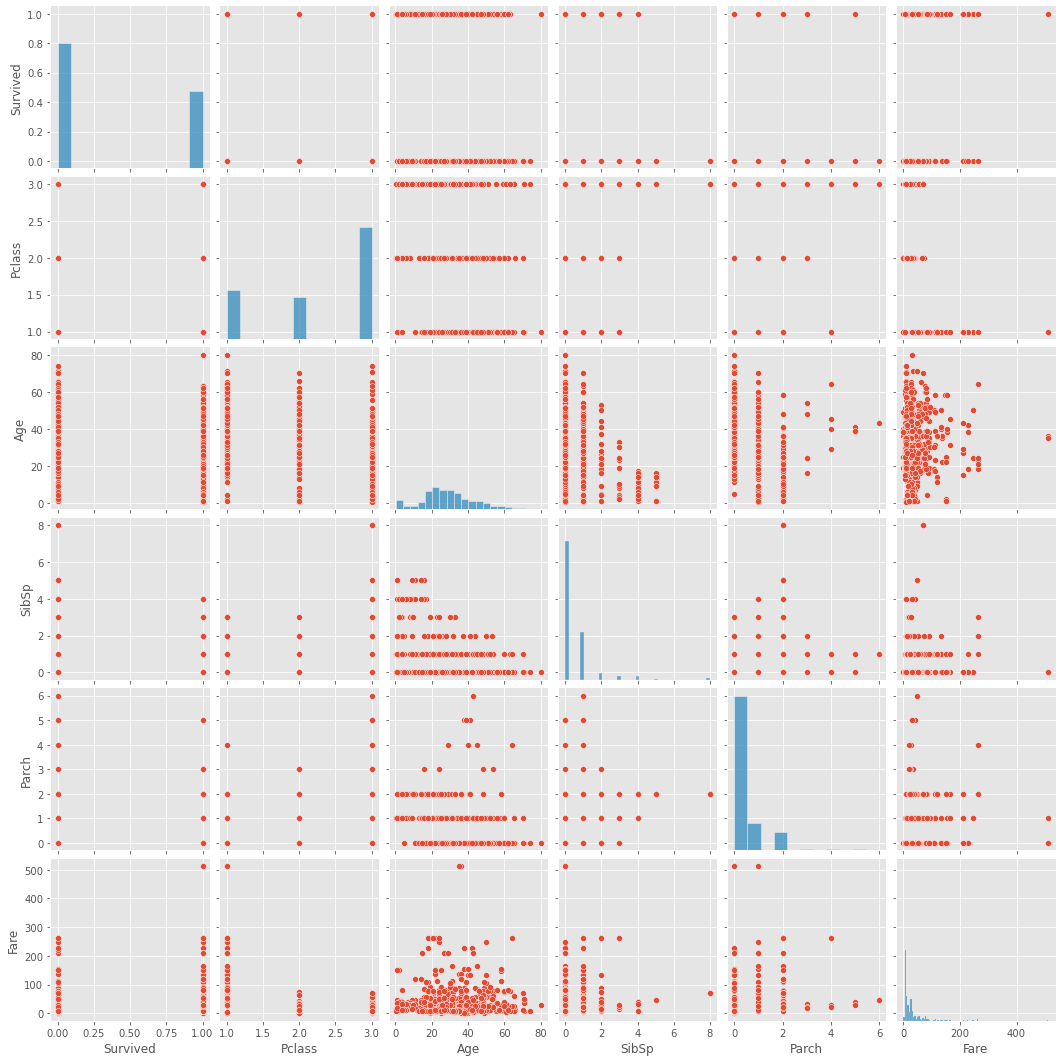

In [13]:
# On peut regarder les relations entre différentes variables numériques
sns.pairplot(data_train)
plt.show()

In [14]:
# Nous allons les utiliser pour labeliser les visualisations
map_survived = {0: 'Died', 1: 'Survived'}
map_pclass = {1: '1st', 2: '2nd', 3: '3rd'}
map_embarked = {'S': 'Southampton', 'C': 'Cherbourg', 'Q': 'Queenstown'}

data_train['_Survived_desc'] = data_train['Survived'].map(map_survived)
data_train['_Pclass_desc'] = data_train['Pclass'].map(map_pclass)
data_train['_Embarked_desc'] = data_train['Embarked'].map(map_embarked)

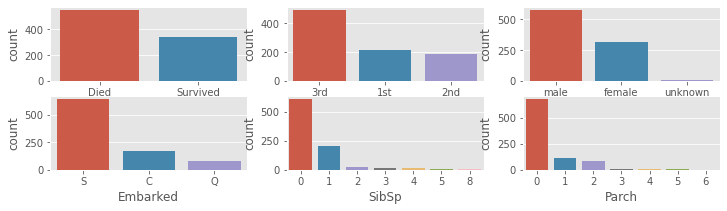

In [15]:
# Vérifier la distribution des passagers par rapport aux valeurs de variables catégorielles
_, axs = plt.subplots(ncols = 3, nrows = 2)
sns.countplot(x=data_train._Survived_desc, ax=axs[0,0])
sns.countplot(x=data_train._Pclass_desc, ax=axs[0,1])
sns.countplot(x=data_train.Sex, ax=axs[0,2])
sns.countplot(x=data_train.Embarked, ax=axs[1,0])
sns.countplot(x=data_train.SibSp, ax=axs[1,1])
sns.countplot(x=data_train.Parch, ax=axs[1,2])
plt.show()

**INTERPRETATIONS** :
*   Plus de passagers morts que de survecus<br/>
*   La majorité des passagers voyageaient en 3eme classe<br/>
*   Il y avait plus d'hommes que de femmes<br/>
*   La plupart des passagers ont embarqué à Southampton

Affichez la distribution des valeurs des variables `Age` et `Fare`.

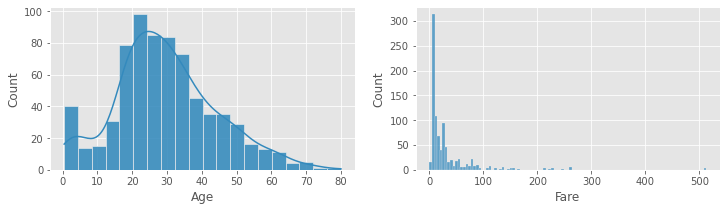

In [16]:
_, axs = plt.subplots(ncols = 2)
sns.histplot(x=data_train.Age, ax=axs[0])
sns.histplot(x=data_train.Age, kde=True, ax=axs[0])
sns.histplot(x=data_train.Fare, ax=axs[1])
plt.show()

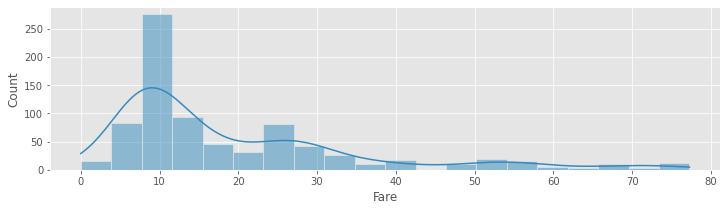

In [17]:
sns.histplot(x=data_train.Fare[data_train.Fare < data_train.Fare.quantile(0.9)], kde=True)
plt.show()

### 2.2 Imputation des valeurs manquantes: Embarked

Remplacez les valeurs manquantes par la valeur la plus fréquente de la variable. Vérifiez que le remplacement a été bien effectué. 

In [18]:
print(f'Nombre de valeurs manquantes pour Embarked: {data_train.Embarked.isnull().sum()}')
display(data_train.Embarked.describe())

Nombre de valeurs manquantes pour Embarked: 2


count     889
unique      3
top         S
freq      644
Name: Embarked, dtype: object

In [19]:
# juste 2 valeurs manquantes: on les remplace par Southampton ('S') qui est le plus fréquent
data_train.loc[data_train.Embarked.isnull(), 'Embarked'] = "S"
# # A value is trying to be set on a copy of a slice from a DataFrame
# data_train.Embarked.loc[data_train.Embarked.isnull()] = "S"

print(f'Nombre de valeurs manquantes pour Embarked: {sum(data_train.Embarked.isnull())}')
display(data_train.Embarked.describe())

Nombre de valeurs manquantes pour Embarked: 0


count     891
unique      3
top         S
freq      646
Name: Embarked, dtype: object

## 3. Analyse exploratoire de données

### 3.1. Pclass ~ Survived

Les passagers avaient-ils plus de chances de survivre s'ils voyageaient en 1ère classe ?
Pour chaque valeur de Pclass affichez le nombre de passagers qui ont survécus et qui n'ont pas survécus. 

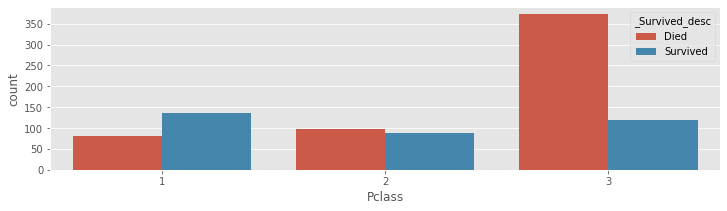

In [20]:
sns.countplot(x=data_train.Pclass, hue=data_train._Survived_desc)
plt.show()

### 3.2. Sex ~ Survived

Le capitaine de Titanic a ordonné de ne prendre sur les canots que les femmes et les enfants. Est-ce que cela a été respecté ?

Affichez le nombre d'hommes et de femmes qui ont survécus et qui n'ont pas survécus. 

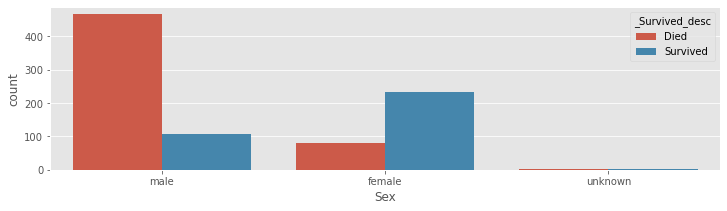

In [21]:
sns.countplot(x=data_train.Sex, hue=data_train._Survived_desc)
plt.show()

### 3.3. Embarkation port ~ Survived

Affichez le nombre de passagers par port d'embarquement qui ont survécus et qui n'ont pas survécus. 

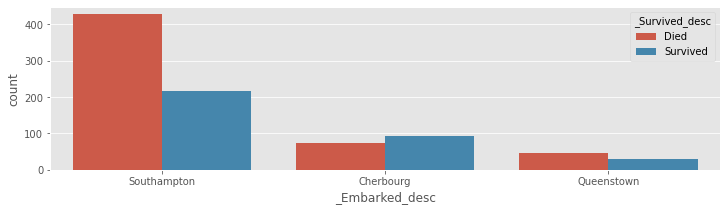

In [22]:
sns.countplot(x=data_train._Embarked_desc, hue=data_train._Survived_desc)
plt.show()

### 3.4. Pclass ~ Embarkation port

Affichez le nombre de passagers par le port d'embarquement en les distinguant par la classe. Veillez à respecter l'ordre des classes dans l'affichage.

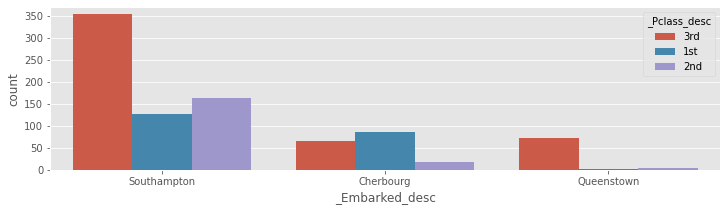

In [23]:
sns.countplot(x=data_train._Embarked_desc, hue=data_train._Pclass_desc)
plt.show()

### 3.5. Age ~ Survived

Affichez la distribution de l'âge des passagers par les valeurs de la variable cible.

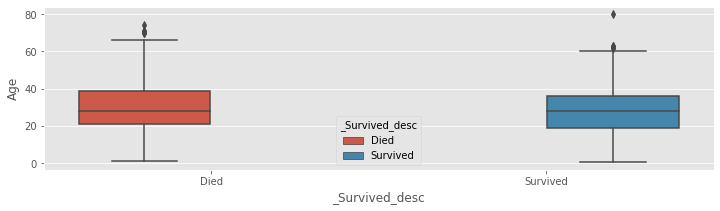

In [24]:
sns.boxplot(x=data_train._Survived_desc, y=data_train.Age, hue=data_train._Survived_desc)
plt.show()

### 3.6. Correlation

Affichez la heatmap de correlation (variables numériques, binaires (Sex, Survived), ordinales).

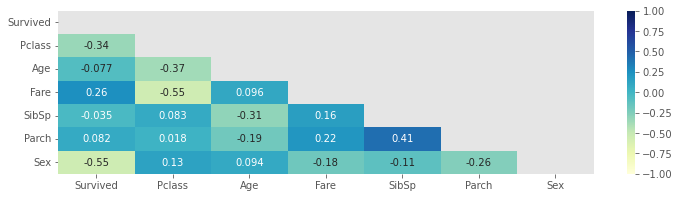

In [25]:
data_corr = data_train[['Survived','Pclass', 'Age', 'Fare', 'SibSp', 'Parch']]\
    .assign(Sex = data_train.Sex.map({'female': 0, 'male': 1})).corr()
mask = np.triu(np.ones_like(data_corr))
sns.heatmap(data_corr, cmap="YlGnBu", annot=True, mask=mask, vmin=-1, vmax=1)
plt.show()

**INTERPRETATIONS** :
*   Plus la classe est élevée, plus le passager a de chances de survivre.
*   L'age a une faible influence sur la chance de survivre.
*   Les personnes plus âgées pouvaient se permettre de voyager en classe plus élevée.
*   Le prix du billet et la classe ont une forte correlation.

## 4. Nettoyage (suite) et préparation de données

### 4.1. Imputation des valeurs manquantes: Sex

Vérifiez les valeurs uniques de la variable `Sex`. Supprimez les lignes correspondants aux valeurs manquantes.

*Update: imputer les valeurs en utilisant les noms des passagers.*

In [26]:
data_train.Sex.value_counts()

male       574
female     312
unknown      5
Name: Sex, dtype: int64

In [27]:
# Attention : méthode non générique, on peut utiliser la variable Title créée plus bas.
filter_male = data_train.Name.str.contains("Mr\.|Master")
filter_female = data_train.Name.str.contains("Miss|Mrs\.")
data_train.loc[(data_train.Sex == 'unknown') & filter_male, 'Sex'] = 'male'
data_train.loc[(data_train.Sex == 'unknown') & filter_female, 'Sex'] = 'female'
data_train.Sex.value_counts()

male      577
female    314
Name: Sex, dtype: int64

### 4.2. Imputation des valeurs manquantes: Age

#### Age: imputation par Pclass

In [28]:
data_train.Age.isnull().sum()

177

Affichez la distribution d'âge par classe.

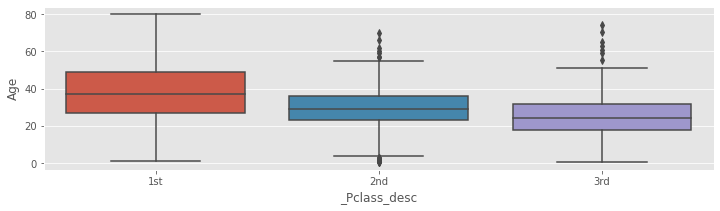

In [29]:
# sns.boxplot(x = data_train._Pclass_desc, y = data_train.Age, order = sorted(data_train._Pclass_desc.value_counts().index))
Pclass_order = sorted(list(set(data_train._Pclass_desc)))
sns.boxplot(x = data_train._Pclass_desc, y = data_train.Age, order = Pclass_order)
plt.show()

Affichez la moyenne et la médiane de l'âge par classe.

In [30]:
data_train.groupby(['Pclass']).agg({'Age': [np.mean, np.median]})

Age       
             mean median
Pclass                  
1       38.233441   37.0
2       29.877630   29.0
3       25.140620   24.0

#### Age: imputation pas Title (nouvelle variable)

Analysons les valeurs de la colonne `Name` :
*   Structure : Nom de famille; Title. Prenoms.
*   Master: pour les enfants garçons.
*   Miss: femmes non mariées, au 19eme siècle la majorité des femmes non mariées étaient des jeunes filles.

In [31]:
data_train.Name.head()

0                              Braund; Mr. Owen Harris
1    Cumings; Mrs. John Bradley (Florence Briggs Th...
2                               Heikkinen; Miss. Laina
3         Futrelle; Mrs. Jacques Heath (Lily May Peel)
4                             Allen; Mr. William Henry
Name: Name, dtype: object

In [32]:
title_prenoms = data_train.Name.str.split(';', expand=True).iloc[:,1]
title = title_prenoms.str.split('.', expand=True).iloc[:,0]
title

0         Mr
1        Mrs
2       Miss
3        Mrs
4         Mr
       ...  
886      Rev
887     Miss
888     Miss
889       Mr
890       Mr
Name: 0, Length: 891, dtype: object

Créez une nouvelle variable - Title (Mr, Miss, Mrs etc.). Affichez ses valeurs uniques et les fréquences correspondantes.

In [33]:
data_train['Title'] = data_train.Name.str.extract('(\w+)\.')
data_train.Title.value_counts()

Mr          517
Miss        182
Mrs         125
Master       40
Dr            7
Rev           6
Mlle          2
Major         2
Col           2
Countess      1
Capt          1
Ms            1
Sir           1
Lady          1
Mme           1
Don           1
Jonkheer      1
Name: Title, dtype: int64

Affichez des Titles pour lesquels on a au moins 1 passager avec l'âge manquant. Pour ces Titles affichez le nombre de passagers, le nombre de valeurs manquantes d'âge et l'âge moyen des passagers.

In [34]:
df_title_age = data_train.groupby('Title').\
    agg({
        'Age': ['size', lambda x: sum(x.isnull()), np.mean]
    })

df_title_age.columns = ['count', 'missing', 'mean']
# display(df_title_age)
# df_title_age.index[df_title_age.missing != 0]
df_title_age[df_title_age.missing != 0]

,count,missing,mean
Title,,,
Dr,7,1,42.000000
Master,40,4,4.574167
Miss,182,36,21.773973
Mr,517,119,32.368090
Mrs,125,17,35.898148


In [35]:
# Fonction générique d'imputation des valeurs d'une colonne (impute_col) par 
# la moyenne par groupes de valeurs d'une autre colonne (filter_col)
def impute_mean (df, impute_col, filter_col):
    for g in df[filter_col].unique():
        df.loc[(df[filter_col] == g) & (df[impute_col].isnull()), impute_col] = np.mean(df[impute_col][df[filter_col] == g])

In [36]:
# On teste la fonction
df1 = pd.DataFrame()
df1 = df1.assign(a = list(range(10)))
df1.loc[list(np.random.randint(0, len(df1), 4)), 'a'] = np.NaN
df1 = df1.assign(b = ['x']*5 + ['y']*5)

# df1.loc[df1.b == 'x', 'a'] = np.NaN

df2 = df1.copy()
impute_mean(df2, 'a', 'b')
pd.concat([df1, df2], axis=1)

,a,b,a,b
0,0.0,x,0.0,x
1,NaN,x,2.0,x
2,NaN,x,2.0,x
3,NaN,x,2.0,x
4,4.0,x,4.0,x
5,NaN,y,7.5,y
6,6.0,y,6.0,y
7,7.0,y,7.0,y
8,8.0,y,8.0,y
9,9.0,y,9.0,y


Imputez les valeurs manquantes d'âge par groupes de Titles. Affichez un histogramme avant et après l'imputation.

In [37]:
display(data_train.Age.describe())
impute_mean(data_train, 'Age', 'Title')
display(data_train.Age.describe())

count    714.000000
mean      29.699118
std       14.526497
min        0.420000
25%       20.125000
50%       28.000000
75%       38.000000
max       80.000000
Name: Age, dtype: float64

count    891.000000
mean      29.754659
std       13.277179
min        0.420000
25%       21.773973
50%       30.000000
75%       35.898148
max       80.000000
Name: Age, dtype: float64

### 4.3. Imputation des valeurs manquantes: Fare

Vérifiez les valeurs de la variable `Fare`. Vous remarquerez que pour certain nombre de passagers la valeur de `Fare` est 0. Nous allons considérer ces valeurs comme manquantes. Vérifiez les valeurs aberrantes. Remplacez les valeurs supérieurs à 300 par NaN également.

In [38]:
# Fare: billets à prix 0 -> NaN
display(data_train.Fare.value_counts().sort_index().head())
data_train.loc[data_train.Fare == 0]

0.0000    15
4.0125     1
5.0000     1
6.2375     1
6.4375     1
Name: Fare, dtype: int64

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,_Survived_desc,_Pclass_desc,_Embarked_desc,Title
179,0,3,Leonard; Mr. Lionel,male,36.00000,0,0,LINE,0.0,NaN,S,Died,3rd,Southampton,Mr
263,0,1,Harrison; Mr. William,male,40.00000,0,0,112059,0.0,B94,S,Died,1st,Southampton,Mr
271,1,3,Tornquist; Mr. William Henry,male,25.00000,0,0,LINE,0.0,NaN,S,Survived,3rd,Southampton,Mr
277,0,2,"Parkes; Mr. Francis ""Frank""",male,32.36809,0,0,239853,0.0,NaN,S,Died,2nd,Southampton,Mr
302,0,3,Johnson; Mr. William Cahoone Jr,male,19.00000,0,0,LINE,0.0,NaN,S,Died,3rd,Southampton,Mr
413,0,2,Cunningham; Mr. Alfred Fleming,male,32.36809,0,0,239853,0.0,NaN,S,Died,2nd,Southampton,Mr
466,0,2,Campbell; Mr. William,male,32.36809,0,0,239853,0.0,NaN,S,Died,2nd,Southampton,Mr
481,0,2,"Frost; Mr. Anthony Wood ""Archie""",male,32.36809,0,0,239854,0.0,NaN,S,Died,2nd,Southampton,Mr
597,0,3,Johnson; Mr. Alfred,male,49.00000,0,0,LINE,0.0,NaN,S,Died,3rd,Southampton,Mr
633,0,1,Parr; Mr. William Henry Marsh,male,32.36809,0,0,112052,0.0,NaN,S,Died,1st,Southampton,Mr


Affichez la distribution de `Fare` par classe de billet. Imputez les valeurs manquantes de `Fare` par la valeur **médiane** pour chaque classe de billet.

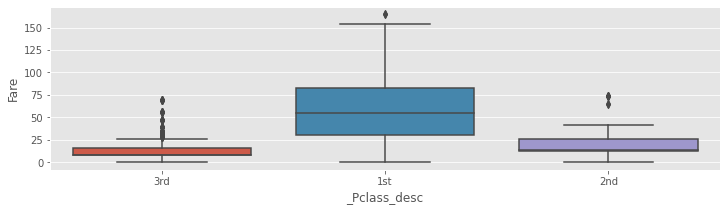

In [39]:
# sns.boxplot(x=data_train._Pclass_desc, y=data_train.Fare)
sns.boxplot(x=data_train._Pclass_desc[data_train.Fare<200], y=data_train.Fare[data_train.Fare<200])
plt.show()

In [40]:
# On impute les valeurs 0 de Fare par la moyenne pour la classe (Pclass) correspondante
data_train.loc[data_train.Fare == 0, 'Fare'] = np.nan
display(data_train.Fare.describe())
impute_mean(data_train, 'Fare', 'Pclass')
display(data_train.Fare.describe())

count    876.000000
mean      32.755650
std       49.936826
min        4.012500
25%        7.925000
50%       14.500000
75%       31.275000
max      512.329200
Name: Fare, dtype: float64

count    891.000000
mean      32.893375
std       49.700581
min        4.012500
25%        7.925000
50%       14.500000
75%       31.275000
max      512.329200
Name: Fare, dtype: float64

## 5. Révision des variables

### Age ~ Title

Il y a trop de valeurs uniques de la variable Title, plusieurs groupes contiennent très peu de passagers. Effectuez un traitement suivant : 

*   Mrs regroupe Mrs, Ms, Mme
*   Miss regroupe Miss, Mlle
*   Aristocratic regroupe Capt, Col, Don, Dr, Jonkheer, Lady, Major, Rev, Sir, Countess

Affichez la distribution d'âge pour ces nouvelles catégories de Title.



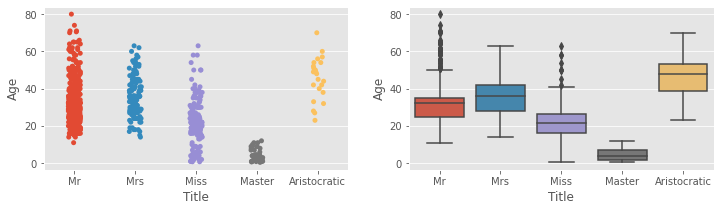

In [41]:
# On peut regrouper les valeurs en 5 groupes: Aristocratic, Mr, Mrs, Miss, Master
data_train.loc[data_train.Title.isin(['Ms', 'Mme']), 'Title'] = 'Mrs'
data_train.loc[data_train.Title.isin(['Mlle']), 'Title'] = 'Miss'
data_train.loc[data_train.Title.isin(['Capt', 'Col', 'Don', 'Dr', 'Jonkheer', 'Lady', 'Major', 'Rev', 'Sir', 'Countess']), 'Title'] = 'Aristocratic'

fig, axs = plt.subplots(ncols = 2)
sns.stripplot(x='Title', y='Age', data=data_train, ax=axs[0])
sns.boxplot(x='Title', y='Age', data=data_train, ax=axs[1])
plt.show()

### Title ~ Survived

Affichez le pourcentage des passagers survécus par leur Title.

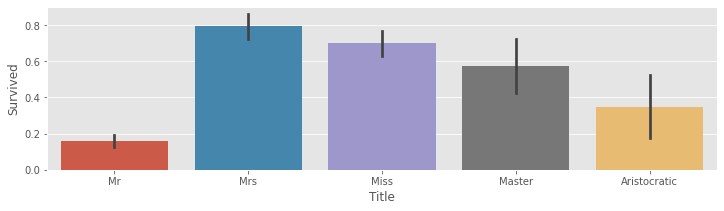

In [42]:
# estimator-mean par défaut
sns.barplot(x = 'Title', y = 'Survived', data = data_train)
plt.show()

Affichez la répartition des passagers par classe, âge et sex. Distinguez les passagers survécus et non survécus.

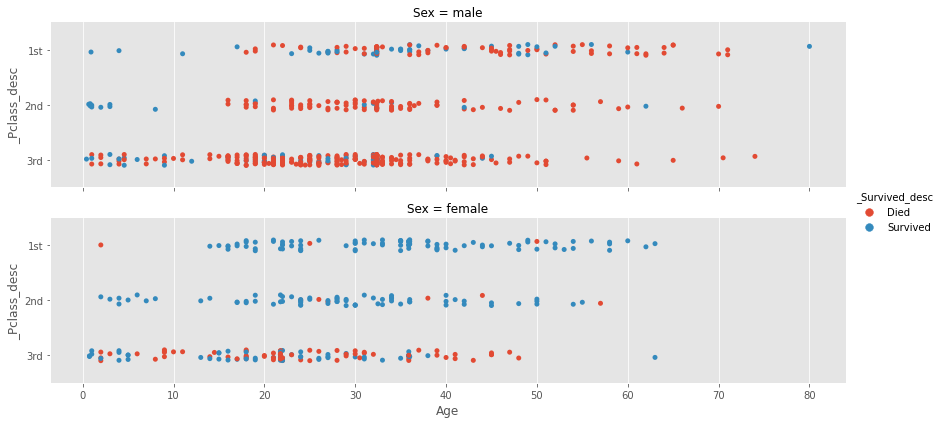

In [43]:
# sns.catplot(data = data_train, x = "Age", y = 'Pclass', hue = "_Survived_desc", row = "Sex", height = 3, aspect = 4)
sns.catplot(data = data_train, x = "Age", y = '_Pclass_desc', hue = "_Survived_desc", row = "Sex", order = Pclass_order, height = 3, aspect = 4)
plt.show()

**INTERPRETATIONS**

*   La majorité des femmes voyageant en 1ère et 2ème classe âges confondus ont survécu.
*   Tous les garçons  de moins de 15 ans voyageant en 1ère et 2ème classe ont survécu.
*   Peu d'hommes ont survécus, c'étaient des hommes plutôt jeunes et voyageant en 1ère classe.

### Family ~ Survived

Affichez le nombre de survécus et le nombre de non survécus pour chaque valeur de SibSp. Affichez le nombre de survécus et le nombre de non survécus pour chaque valeur de Parch.

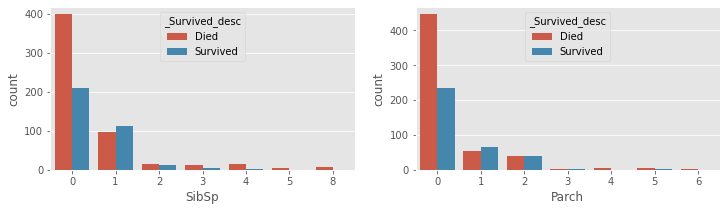

In [44]:
# trouver le moyen d'ajouter le vertical jitter
# sns.stripplot(data = data_train, x = "SibSp", y = "Parch", hue = survived_desc)
fig, axs = plt.subplots(ncols = 2)
sns.countplot(data=data_train, x='SibSp', hue='_Survived_desc', ax=axs[0])
sns.countplot(data=data_train, x='Parch', hue='_Survived_desc', ax=axs[1])
# Il paraît qu'il y avait plus de chances de ne pas survivre pour les 
# passagers qui n'avaient pas de membres de famille sur Titanic, ainsi que
# ceux qui en avaient beaucoup.
plt.show()

Ajoutez la nouvelle variable `Family` avec `SibSp + Parch` comme valeurs. Affichez le pourcentage des passagers survécus pour chaque valeur de cette nouvelle variable.

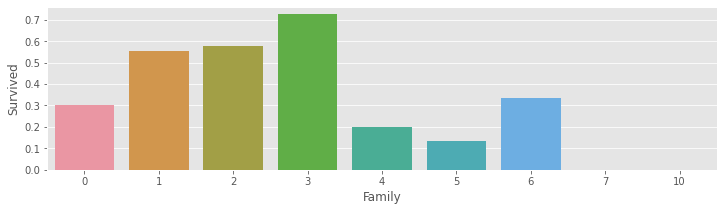

In [45]:
data_train = data_train.assign(Family = data_train.SibSp + data_train.Parch)
sns.barplot(x = data_train.Family, y = data_train.Survived, ci = None)
plt.show()

Affichez le pourcentage des passagers survécus par `Family` et `Sex`. 

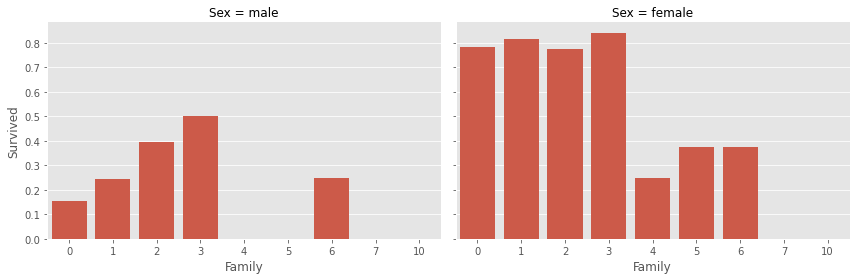

In [46]:
g = sns.FacetGrid(data_train, col="Sex", height = 4, aspect = 1.5)
g.map(sns.barplot, "Family", "Survived", order = sorted(data_train.Family.unique()), ci = None)
# Pour des femmes : moins de membres de famille sur Titanic, plus de chances de survivre?
plt.show()

Ajoutez une nouvelle variable binaire `hasFamily`. Affichez le pourcentage des passagers survécus par rapport à `hasFamily`.

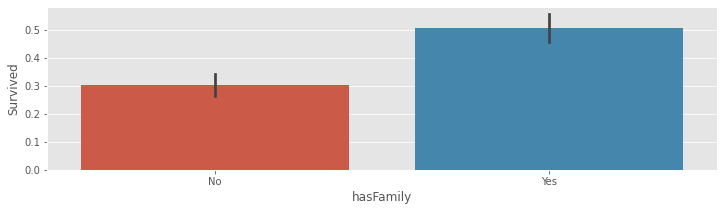

In [47]:
data_train = data_train.assign(hasFamily = (data_train.Family > 0).astype(int))
# data_train.hasFamily.head()
sns.barplot(x = data_train.hasFamily, y = data_train.Survived).set(xticklabels=['No','Yes'])
plt.show()

Affichez le pourcentage des passagers survécus par rapport à `hasFamily` dans un FacetGrid basé sur `Pclass` et `Sex`.

Présence des membres de familles sur Tinanic augmente la chance de survivre?

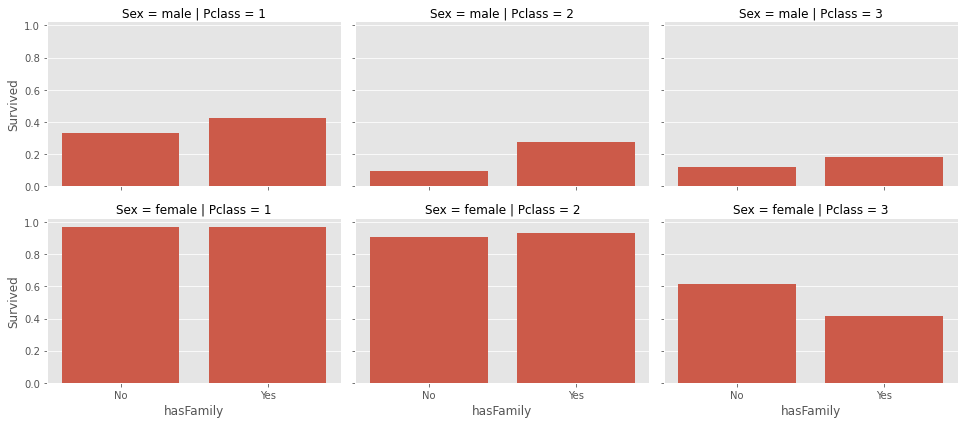

In [48]:
g = sns.FacetGrid(data_train, col="Pclass", row="Sex", height = 3, aspect = 1.5)
g.map(sns.barplot, "hasFamily", "Survived", order = [0,1], ci = None)
g.set(xticklabels=['No','Yes'])
plt.show()

### Cabin ~ Survived

Du numéro de la cabine occupée par le passager il serait possible d'extraire le numéro de pont (la lettre) et le côté duquel se trouvait la cabine (si le dernier chiffre de Cabin est impair, alors c'est le côté gauche, sinon - droit), mais, puisque seuls 20% des passagers ont des numéros de cabine saisis, cela ne devrait pas améliorer la précision du modèle.

Mais ce qui est intéressant, c'est la présence même du numéro. Les numéros des cabines de 1ère classe sont devenus connus à partir de la liste qui a été trouvée sur le corps de Steward Herbert Cave, aucune autre information officielle n'a été conservée: https://www.encyclopedia-titanica.org/cave-list.html

Ajoutez une nouvelle variable binaire `isCabin` et affichez le pourcentage des passagers survécus par rapport à cette nouvelle variable.

In [49]:
display(data_train.Cabin.head(10))
data_train.Cabin.isnull().mean()

0     NaN
1     C85
2     NaN
3    C123
4     NaN
5     NaN
6     E46
7     NaN
8     NaN
9     NaN
Name: Cabin, dtype: object

0.7710437710437711

In [50]:
data_train = data_train.assign(isCabin = (~data_train.Cabin.isnull()).astype(int))
data_train.isCabin.head(10)
isCabin_desc = data_train['isCabin'].map({0: 'No', 1: 'Yes'})

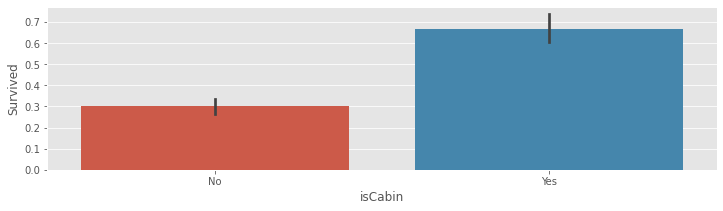

In [51]:
g = sns.barplot(x = isCabin_desc, y = data_train.Survived, order = ['No', 'Yes']) 

Affichez le pourcentage des passagers survécus par `Pclass` et `isCabin`.
Affichez le pourcentage des passagers survécus par rapport à `isCabin` dans un FacetGrid basé sur `Pclass` et `Sex`.

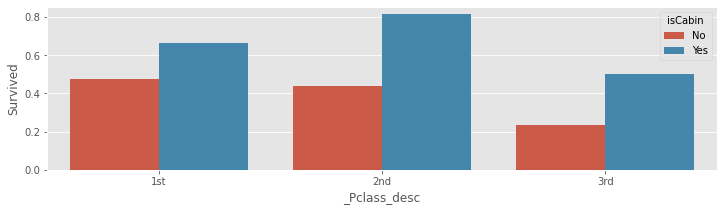

In [52]:
g = sns.barplot(data=data_train, x='_Pclass_desc', y='Survived', hue = isCabin_desc, ci = None, order = Pclass_order) 

### Correlation
Affichez la heatmap de correlation pour le dataframe avec des nouvelles variables (supprimez les variables qui ont été transformées).

In [53]:
data_train.drop(['Name', 'SibSp', 'Parch', 'Cabin', 'Ticket'], axis=1, inplace=True)

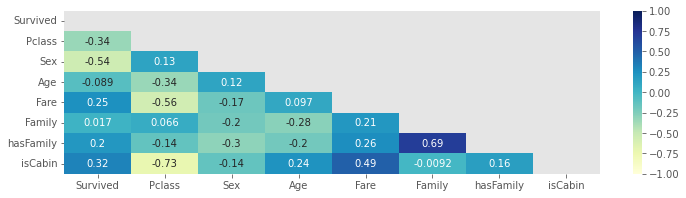

In [54]:
data_corr = data_train.assign(Sex = data_train.Sex.map({'female': 0, 'male': 1})).corr()
mask = np.triu(np.ones_like(data_corr))
sns.heatmap(data_corr, cmap="YlGnBu", annot=True, mask=mask, vmin=-1, vmax=1)
plt.show()

## 6. Simples prédictions

Réalisez un simple modèle qui retourne 1 pour toutes les femmes et 0 pour les hommes. Calculez les prédictions pour le dataset.

In [55]:
def predict_base(row):
    return (1 if row.Sex == 'female' else 0)

y_pred_base = data_train.apply(predict_base, axis=1)

In [56]:
from sklearn.metrics import accuracy_score
# évaluation du modèle: survived_0 - prédictions obtenues avec le modèle
accuracy_score(data_train.Survived, y_pred_base)

0.7867564534231201

Essayez d'améliorer la prédiction du modèle en utilisant d'autres variables.

In [57]:
# def predict_2(row):
#     ...

# y_pred_2 = data_train.apply(predict_2, axis=1)
# accuracy_score(data_train.Survived, y_pred_2)

## 7. Régression logistique

Références:<br/>
[User guide for scikit learn](https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression)

In [58]:
data_train.head()

,Survived,Pclass,Sex,Age,Fare,Embarked,_Survived_desc,_Pclass_desc,_Embarked_desc,Title,Family,hasFamily,isCabin
0,0,3,male,22.0,7.2500,S,Died,3rd,Southampton,Mr,1,1,0
1,1,1,female,38.0,71.2833,C,Survived,1st,Cherbourg,Mrs,1,1,1
2,1,3,female,26.0,7.9250,S,Survived,3rd,Southampton,Miss,0,0,0
3,1,1,female,35.0,53.1000,S,Survived,1st,Southampton,Mrs,1,1,1
4,0,3,male,35.0,8.0500,S,Died,3rd,Southampton,Mr,0,0,0


In [59]:
data_train = data_train[['Survived', 'Pclass', 'Sex', 'Age', 'Fare', 'Embarked', 'hasFamily', 'isCabin']]

In [60]:
data_train.describe()

,Survived,Pclass,Age,Fare,hasFamily,isCabin
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.754659,32.893375,0.397306,0.228956
std,0.486592,0.836071,13.277179,49.700581,0.489615,0.420397
min,0.000000,1.000000,0.420000,4.012500,0.000000,0.000000
25%,0.000000,2.000000,21.773973,7.925000,0.000000,0.000000
50%,0.000000,3.000000,30.000000,14.500000,0.000000,0.000000
75%,1.000000,3.000000,35.898148,31.275000,1.000000,0.000000
max,1.000000,3.000000,80.000000,512.329200,1.000000,1.000000


In [61]:
data_train.head()

,Survived,Pclass,Sex,Age,Fare,Embarked,hasFamily,isCabin
0,0,3,male,22.0,7.2500,S,1,0
1,1,1,female,38.0,71.2833,C,1,1
2,1,3,female,26.0,7.9250,S,0,0
3,1,1,female,35.0,53.1000,S,1,1
4,0,3,male,35.0,8.0500,S,0,0


In [62]:
from sklearn.preprocessing import OneHotEncoder

cols_ohe = ['Sex', 'Pclass', 'Embarked']
cols_num = ['Survived', 'Age', 'Fare', 'hasFamily', 'isCabin']

ohe = OneHotEncoder(handle_unknown="ignore", sparse=False)
data_train_logreg = ohe.fit_transform(data_train[cols_ohe])
data_train_logreg = pd.DataFrame( data_train_logreg, columns=ohe.get_feature_names_out())

data_train_logreg = pd.concat([data_train[cols_num], data_train_logreg], axis=1)

data_train_logreg['isMinor'] = np.where(data_train_logreg['Age'] <= 16, 1, 0)

In [63]:
# from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

cols_scale = ['Age', 'Fare']

# scaler = StandardScaler()
# data_train_logreg[cols_scale] = scaler.fit_transform(data_train_logreg[cols_scale])

scaler = MinMaxScaler()
data_train_logreg_scaled = data_train_logreg.copy()
data_train_logreg_scaled[cols_scale] = scaler.fit_transform(data_train_logreg_scaled[cols_scale])

In [64]:
display(data_train_logreg_scaled.sample(5))
data_train_logreg_scaled.describe()

,Survived,Age,Fare,hasFamily,isCabin,Sex_female,Sex_male,Pclass_1,Pclass_2,Pclass_3,Embarked_C,Embarked_Q,Embarked_S,isMinor
506,1,0.409399,0.043256,1,0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0
839,1,0.401459,0.050534,0,1,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0
707,1,0.522493,0.043821,0,1,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0
872,0,0.409399,0.001943,0,1,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0
429,1,0.396833,0.007943,0,1,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0


,Survived,Age,Fare,hasFamily,isCabin,Sex_female,Sex_male,Pclass_1,Pclass_2,Pclass_3,Embarked_C,Embarked_Q,Embarked_S,isMinor
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,0.383838,0.368618,0.056817,0.397306,0.228956,0.352413,0.647587,0.242424,0.206510,0.551066,0.188552,0.086420,0.725028,0.116723
std,0.486592,0.166841,0.097775,0.489615,0.420397,0.477990,0.477990,0.428790,0.405028,0.497665,0.391372,0.281141,0.446751,0.321270
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.268333,0.007697,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.371701,0.020632,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000
75%,1.000000,0.445817,0.053633,1.000000,0.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [65]:
X = data_train_logreg_scaled.drop(columns=['Survived'])
y = data_train_logreg_scaled['Survived']

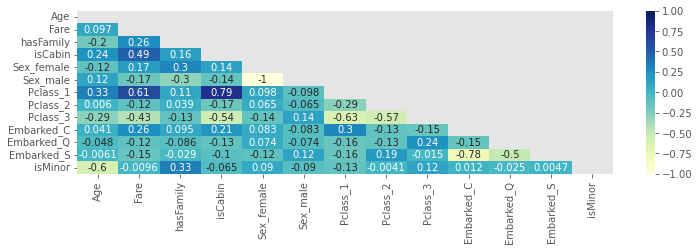

In [66]:
data_corr = X.corr()
mask = np.triu(np.ones_like(data_corr))
sns.heatmap(data_corr, cmap="YlGnBu", annot=True, mask=mask, vmin=-1, vmax=1)
plt.show()

In [67]:
X.shape

(891, 13)

### 7.1. Recursive feature elimination

Étant donné un estimateur externe qui attribue des poids aux variables, l'élimination récursive des variables (Recursive feature elimination, RFE) consiste à considérer des ensembles de variables de plus en plus petits de manière récursive. Tout d'abord, l'estimateur est entraîné sur l'ensemble initial de variables et l'importance de chaque variable est obtenue soit par `coef_attribut`, soit par `feature_importances_`. Ensuite, les variables les moins importantes sont éliminées. Cette procédure est répétée de manière récursive jusqu'à ce que le nombre souhaité de variables soit éventuellement atteint.

Références: <br/>
http://scikit-learn.org/stable/modules/feature_selection.html<br/>
https://machinelearningmastery.com/rfe-feature-selection-in-python/

In [68]:
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFE

for n_features_to_select in [4, 6, 8]:
    # Build a logreg and compute the feature importances
    model = LogisticRegression()
    # create the RFE model and select the given number of attributes
    rfe = RFE(estimator=model, n_features_to_select=n_features_to_select)
    rfe = rfe.fit(X, y)
    # summarize the selection of the attributes
    print(f'n_features_to_select = {n_features_to_select}, Selected features: {list(X.columns[rfe.support_])}')

n_features_to_select = 4, Selected features: ['Age', 'Sex_female', 'Sex_male', 'Pclass_3']
n_features_to_select = 6, Selected features: ['Age', 'isCabin', 'Sex_female', 'Sex_male', 'Pclass_3', 'isMinor']
n_features_to_select = 8, Selected features: ['Age', 'isCabin', 'Sex_female', 'Sex_male', 'Pclass_1', 'Pclass_3', 'Embarked_S', 'isMinor']


### 4.1.2. Feature ranking with recursive feature elimination and cross-validation

RFECV effectue RFE dans une boucle de validation croisée afin de trouver le nombre optimal de variables.

Optimal number of features: 11
Selected features: ['Age', 'hasFamily', 'isCabin', 'Sex_female', 'Sex_male', 'Pclass_1', 'Pclass_2', 'Pclass_3', 'Embarked_C', 'Embarked_S', 'isMinor']


InvalidIndexError: (slice(None, None, None), None)

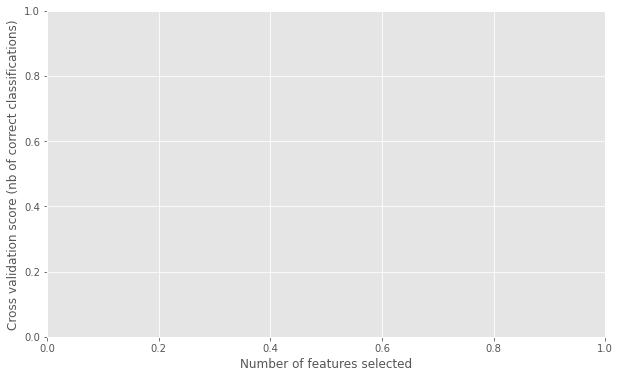

In [70]:
from sklearn.feature_selection import RFECV

# Create the RFE object and compute a cross-validated score.
# The "accuracy" scoring is proportional to the number of correct classifications
rfecv = RFECV(estimator=LogisticRegression(), step=1, cv=10, scoring='accuracy')
rfecv.fit(X, y)

print("Optimal number of features: %d" % rfecv.n_features_)
print('Selected features: %s' % list(X.columns[rfecv.support_]))

# Plot number of features VS. cross-validation scores
plt.figure(figsize=(10,6))
plt.xlabel("Number of features selected")
plt.ylabel("Cross validation score (nb of correct classifications)")
xticks = range(1, X.shape[1]+1)
plt.plot(xticks, pd.DataFrame.from_dict(rfecv.cv_results_).drop(columns=['mean_test_score', 'std_test_score']))
plt.xticks(xticks)
plt.show()

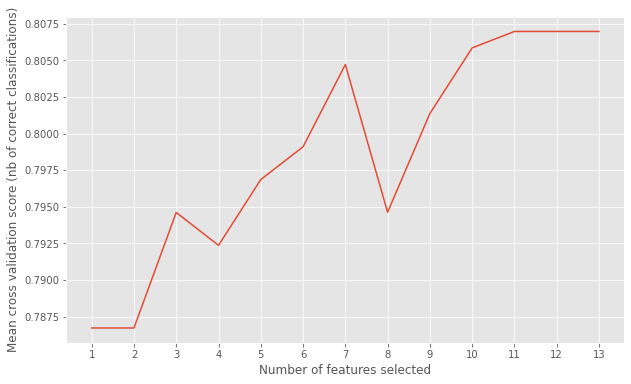

In [71]:
# Plot number of features VS. cross-validation scores
plt.figure(figsize=(10,6))
plt.xlabel("Number of features selected")
plt.ylabel("Mean cross validation score (nb of correct classifications)")
xticks = range(1, X.shape[1]+1)
plt.plot(xticks, rfecv.cv_results_['mean_test_score'])
plt.xticks(xticks)
plt.show()

Optimal number of features: 5
Selected features: ['isCabin', 'Sex_male', 'Pclass_3', 'Embarked_S', 'isMinor']


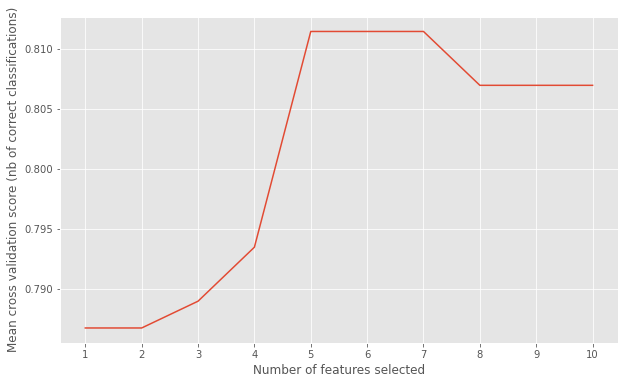

In [72]:
from sklearn.feature_selection import RFECV

# Create the RFE object and compute a cross-validated score.
# The "accuracy" scoring is proportional to the number of correct classifications
X_temp = X.drop(columns=['Age', 'Fare', 'Sex_female'])
rfecv = RFECV(estimator=LogisticRegression(), step=1, cv=10, scoring='accuracy')
rfecv.fit(X_temp, y)

print("Optimal number of features: %d" % rfecv.n_features_)
print('Selected features: %s' % list(X_temp.columns[rfecv.support_]))

# Plot number of features VS. cross-validation scores
plt.figure(figsize=(10,6))
plt.xlabel("Number of features selected")
plt.ylabel("Mean cross validation score (nb of correct classifications)")
xticks = range(1, X_temp.shape[1]+1)
plt.plot(xticks, rfecv.cv_results_['mean_test_score'])
plt.xticks(xticks)
plt.show()

In [73]:
Selected_features = ['isCabin', 'Sex_male', 'Pclass_3', 'Embarked_S', 'isMinor']
X = data_train_logreg[Selected_features]

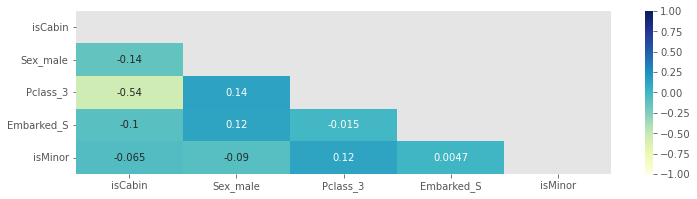

In [74]:
data_corr = X.corr()
mask = np.triu(np.ones_like(data_corr))
sns.heatmap(data_corr, cmap="YlGnBu", annot=True, mask=mask, vmin=-1, vmax=1)
plt.show()

## 4.2. Evaluation de modèle

Besoin d'un moyen de faire un choix parmi plusieurs modèles de machine learning. L'objectif est d'estimer les performances probables d'un modèle sur les données en dehors de l'échantillon.

On fractionne l'échantillon initial en deux sous-échantillons : celui d'entraînement et celui de test
- Le modèle est entraîné et testé sur les données différentes
- La précision sur les données de test qui n'étaient pas utilisées dans l'entraînement, donne une meilleure estimation des performances d'un modèle
- Problème avec le fractionnement train/test
    - La précision d'un modèle peut varier de manière significative avec les différents fractionnements de données

Référence :<br/>
http://www.ritchieng.com/machine-learning-cross-validation/

### 4.2.1. Evaluation du modèle avec un simple fractionnement train/test utilisant la fonction `train_test_split()`

Train/Test split results:
LogisticRegression accuracy is 0.777
LogisticRegression log_loss is 0.496
LogisticRegression auc is 0.846


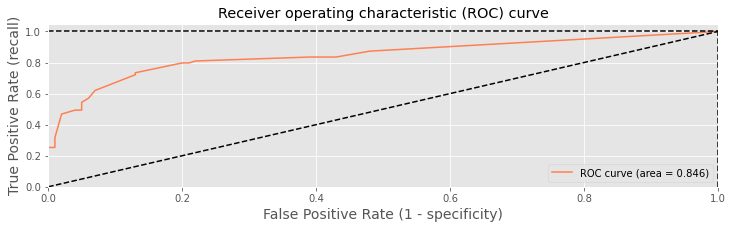

Using a threshold of 0.061 guarantees a sensitivity of 1.000 and a specificity of 0.000, i.e. a false positive rate of 100.00%.


In [75]:
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import accuracy_score, classification_report, precision_score, recall_score 
from sklearn.metrics import confusion_matrix, precision_recall_curve, roc_curve, auc, log_loss

# use train/test split with different random_state values
# we can change the random_state values that changes the accuracy scores
# the scores change a lot, this is why testing scores is a high-variance estimate
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2)

# check classification scores of logistic regression
logreg = LogisticRegression()
logreg.fit(X_train, y_train)
y_pred = logreg.predict(X_test)
y_pred_proba = logreg.predict_proba(X_test)[:, 1]

[fpr, tpr, thr] = roc_curve(y_test, y_pred_proba)
print('Train/Test split results:')
print(logreg.__class__.__name__+" accuracy is %2.3f" % accuracy_score(y_test, y_pred))
print(logreg.__class__.__name__+" log_loss is %2.3f" % log_loss(y_test, y_pred_proba))
print(logreg.__class__.__name__+" auc is %2.3f" % auc(fpr, tpr))

idx = np.min(np.where(tpr > 0.95)) # index of the first threshold for which the sensibility > 0.95

plt.figure()
plt.plot(fpr, tpr, color='coral', label='ROC curve (area = %0.3f)' % auc(fpr, tpr))
plt.plot([0, 1], [0, 1], 'k--')
plt.plot([0,fpr[idx]], [tpr[idx],tpr[idx]], 'k--')
plt.plot([fpr[idx],fpr[idx]], [0,tpr[idx]], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate (1 - specificity)', fontsize=14)
plt.ylabel('True Positive Rate (recall)', fontsize=14)
plt.title('Receiver operating characteristic (ROC) curve')
plt.legend(loc="lower right")
plt.show()

print("Using a threshold of %.3f " % thr[idx] + "guarantees a sensitivity of %.3f " % tpr[idx] +  
      "and a specificity of %.3f" % (1-fpr[idx]) + 
      ", i.e. a false positive rate of %.2f%%." % (np.array(fpr[idx])*100))

In [76]:
logreg.coef_

array([[ 0.9152648 , -2.53657214, -1.26296015, -0.53801533,  1.11714877]])

### 4.2.2. Evaluation du modèle basée sur la validation croisée K-fold utilisant la fonction `cross_val_score()` 

In [77]:
# 10-fold (cv=10) cross-validation logistic regression
logreg = LogisticRegression()

scores_accuracy = cross_val_score(logreg, X, y, cv=10, scoring='accuracy')
scores_log_loss = cross_val_score(logreg, X, y, cv=10, scoring='neg_log_loss')
scores_auc = cross_val_score(logreg, X, y, cv=10, scoring='roc_auc')

print('K-fold cross-validation results:')
print(logreg.__class__.__name__+" average accuracy is %2.3f" % scores_accuracy.mean())
print(logreg.__class__.__name__+" average log_loss is %2.3f" % -scores_log_loss.mean())
print(logreg.__class__.__name__+" average auc is %2.3f" % scores_auc.mean())

K-fold cross-validation results:
LogisticRegression average accuracy is 0.811
LogisticRegression average log_loss is 0.450
LogisticRegression average auc is 0.854


### 4.2.3. Evaluation du modèle basée sur la validation croisée utilisant la fonction `cross_validate()` 

In [78]:
from sklearn.model_selection import cross_validate

scoring = {'accuracy': 'accuracy', 'log_loss': 'neg_log_loss', 'auc': 'roc_auc'}
modelCV = LogisticRegression()
# cross_validate allows evaluating multiple scores
results = cross_validate(estimator=modelCV, X=X, y=y, cv=10, scoring=list(scoring.values()), return_train_score=False)

estimator_name = modelCV.__class__.__name__
print('K-fold cross-validation results:')
for sc_key, sc_value in scoring.items():
    avg_score = results[f'test_{sc_value}'].mean()
    if sc_value=='neg_log_loss': 
        avg_score = -avg_score
    print(f"{estimator_name} average {sc_key}: {avg_score:.3f} (+/-{results[f'test_{sc_value}'].std():.3f})")

K-fold cross-validation results:
LogisticRegression average accuracy: 0.811 (+/-0.028)
LogisticRegression average log_loss: 0.450 (+/-0.043)
LogisticRegression average auc: 0.854 (+/-0.035)


In [79]:
# What happens if we add the feature "Fare"
Selected_features.append('Fare')
print(Selected_features)

X = data_train_logreg_scaled[Selected_features]

scoring = {'accuracy': 'accuracy', 'log_loss': 'neg_log_loss', 'auc': 'roc_auc'}
modelCV = LogisticRegression()
results = cross_validate(modelCV, X, y, cv=10, scoring=list(scoring.values()), return_train_score=False)

estimator_name = modelCV.__class__.__name__
print('K-fold cross-validation results:')
for sc_key, sc_value in scoring.items():
    avg_score = results['test_%s' % sc_value].mean()
    if sc_value=='neg_log_loss': 
        avg_score = -avg_score
    print(f"{estimator_name} average {sc_key}: {avg_score:.3f} (+/-{results[f'test_{sc_value}'].std():.3f})")

['isCabin', 'Sex_male', 'Pclass_3', 'Embarked_S', 'isMinor', 'Fare']
K-fold cross-validation results:
LogisticRegression average accuracy: 0.810 (+/-0.030)
LogisticRegression average log_loss: 0.451 (+/-0.043)
LogisticRegression average auc: 0.850 (+/-0.039)


On peut noter que le modèle est légèrement détérioré. La variable "Fare" ne contient aucune information utile. Sa présence n'est qu'un bruit pour le modèle de régression logistique.

## 4.3. GridSearchCV

best estimator: LogisticRegression(C=0.40001000000000003)
best params: {'C': 0.40001000000000003}
best score: 0.8114731585518102


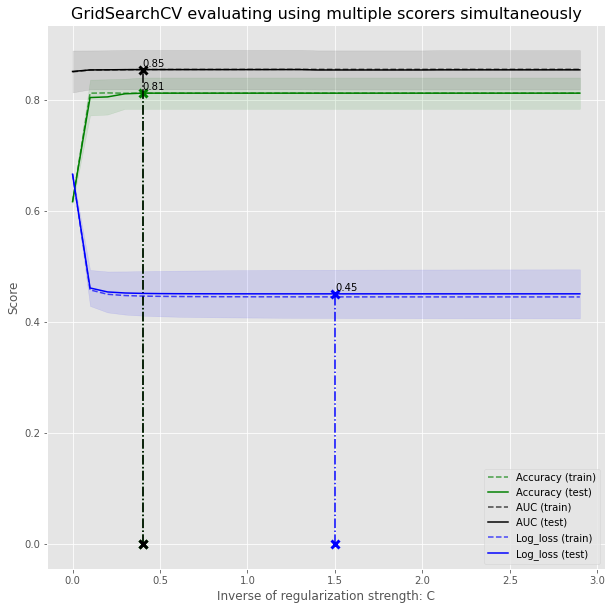

In [80]:
from sklearn.model_selection import GridSearchCV

Selected_features = ['isCabin', 'Pclass_3', 'Embarked_S', 'Sex_male', 'isMinor']
X = data_train_logreg[Selected_features]

# C: float, default=1.0, inverse of regularization strength; must be a positive float. Smaller values specify stronger regularization.
param_grid = {'C': np.arange(1e-05, 3, 0.1)}
scoring = {'Accuracy': 'accuracy', 'AUC': 'roc_auc', 'Log_loss': 'neg_log_loss'}

gs = GridSearchCV(LogisticRegression(), return_train_score=True,
                  param_grid=param_grid, scoring=scoring, cv=10, refit='Accuracy')

gs.fit(X, y)
results = gs.cv_results_

print('='*20)
print("best estimator: " + str(gs.best_estimator_))
print("best params: " + str(gs.best_params_))
print('best score:', gs.best_score_)
print('='*20)

fig, ax = plt.subplots(figsize=[10, 10])

plt.title("GridSearchCV evaluating using multiple scorers simultaneously",fontsize=16)

# Get the regular numpy array from the MaskedArray
X_axis = np.array(results['param_C'].data, dtype=float)

plt.xlabel("Inverse of regularization strength: C")
plt.ylabel("Score")

for scorer, color in zip(list(scoring.keys()), ['g', 'k', 'b']): 
    for sample, style in (('train', '--'), ('test', '-')):
        
        sample_score_mean = results[f'mean_{sample}_{scorer}']
        if scoring[scorer] == 'neg_log_loss':
            sample_score_mean = -sample_score_mean
        sample_score_std = results[f'std_{sample}_{scorer}']
        
        plt.fill_between(X_axis, sample_score_mean - sample_score_std, sample_score_mean + sample_score_std,
                        alpha=0.1 if sample == 'test' else 0, color=color)
        plt.plot(X_axis, sample_score_mean, 
                 style, color=color, alpha=1 if sample == 'test' else 0.7,
                 label=f"{scorer} ({sample})")

    best_index = np.nonzero(results[f'rank_test_{scorer}'] == 1)[0][0]
    best_score = results[f'mean_test_{scorer}'][best_index]
    if scoring[scorer] == 'neg_log_loss':
        best_score = -best_score
        
    # Plot a dotted vertical line at the best score for that scorer marked by x
    plt.plot([X_axis[best_index], ] * 2, [0, best_score],
            linestyle='-.', color=color, marker='x', markeredgewidth=3, ms=8)

    # Annotate the best score for that scorer
    ax.annotate("%0.2f" % best_score, (X_axis[best_index], best_score + 0.005))

plt.legend(loc="best")

plt.show()

Nous pouvons appliquer de nombreuses tâches ensemble pour une évaluation plus approfondie, comme recherche de hyperparamètres sur une grille utilisant une validation croisée répétée plusieurs fois, qui peut être mise à l'échelle ou non par rapport à de nombreux marqueurs et réglage sur paramètre pour un estimateur donné.

Référence:<br/>
[Cross validation iterators](https://scikit-learn.org/stable/modules/cross_validation.html?highlight=repeatedstratifiedkfold#cross-validation-iterators)

In [81]:
X = data_train_logreg[['isCabin', 'Pclass_3', 'Embarked_S', 'Sex_male', 'Age']]
y = data_train_logreg.Survived

In [82]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.pipeline import Pipeline

scoring = {'Accuracy': 'accuracy', 'AUC': 'roc_auc', 'Log_loss': 'neg_log_loss'}

# Define the CV method (itérateur différent de celui précédemment utilisé, cf. référence ci-dessus)
rskfold = RepeatedStratifiedKFold(n_splits=5, n_repeats=5, random_state=2)

log_clf_pipe = Pipeline(steps=[
        ('scale', StandardScaler()), 
        ('clf', LogisticRegression(solver='liblinear'))])

param_grid = {
        'clf__penalty': ['l1', 'l2'],
        'clf__C': np.arange(1e-05, 3, 0.1)}

log_clf = GridSearchCV(estimator=log_clf_pipe, cv=rskfold,
              scoring=scoring, return_train_score=True,
              param_grid=param_grid, refit='Accuracy')

log_clf.fit(X, y)

print('='*20)
print("best estimator: " + str(log_clf.best_estimator_))
print("best params: " + str(log_clf.best_params_))
print('best score:', log_clf.best_score_)
print('='*20)

gs_results = pd.DataFrame(log_clf.cv_results_)
gs_results.head()

best estimator: Pipeline(steps=[('scale', StandardScaler()),
                ('clf',
                 LogisticRegression(C=2.00001, penalty='l1',
                                    solver='liblinear'))])
best params: {'clf__C': 2.00001, 'clf__penalty': 'l1'}
best score: 0.8011223400916451


,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_clf__C,param_clf__penalty,params,split0_test_Accuracy,split1_test_Accuracy,split2_test_Accuracy,...,split17_train_Log_loss,split18_train_Log_loss,split19_train_Log_loss,split20_train_Log_loss,split21_train_Log_loss,split22_train_Log_loss,split23_train_Log_loss,split24_train_Log_loss,mean_train_Log_loss,std_train_Log_loss
0,0.003232,0.001066,0.004891,0.001588,0.00001,l1,"{'clf__C': 1e-05, 'clf__penalty': 'l1'}",0.614525,0.617978,0.617978,...,-0.693147,-0.693147,-0.693147,-0.693147,-0.693147,-0.693147,-0.693147,-0.693147,-0.693147,1.110223e-16
1,0.003582,0.001349,0.004849,0.001503,0.00001,l2,"{'clf__C': 1e-05, 'clf__penalty': 'l2'}",0.793296,0.758427,0.775281,...,-0.692128,-0.692131,-0.692173,-0.692137,-0.692155,-0.692193,-0.692146,-0.692166,-0.692159,3.246553e-05
2,0.003008,0.001152,0.004691,0.001707,0.10001,l1,"{'clf__C': 0.10001, 'clf__penalty': 'l1'}",0.821229,0.730337,0.792135,...,-0.446865,-0.438007,-0.443985,-0.438024,-0.448620,-0.448108,-0.444413,-0.454269,-0.446490,7.833262e-03
3,0.003317,0.001354,0.005307,0.001933,0.10001,l2,"{'clf__C': 0.10001, 'clf__penalty': 'l2'}",0.815642,0.741573,0.786517,...,-0.443845,-0.434929,-0.440777,-0.434880,-0.445567,-0.444926,-0.441244,-0.451263,-0.443387,7.837640e-03
4,0.002740,0.001139,0.004163,0.001376,0.20001,l1,"{'clf__C': 0.20001000000000002, 'clf__penalty'...",0.832402,0.735955,0.780899,...,-0.443416,-0.434152,-0.440099,-0.434159,-0.444960,-0.444356,-0.440746,-0.450815,-0.442804,7.967668e-03


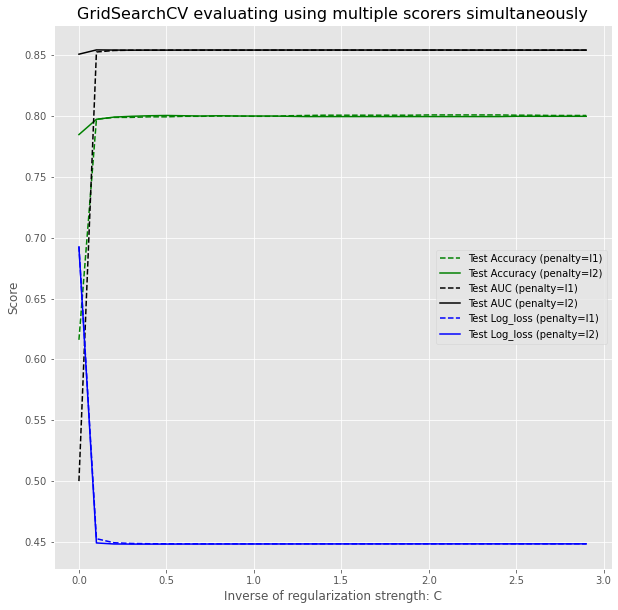

In [83]:
fig, ax = plt.subplots(figsize=[10, 10])
plt.title("GridSearchCV evaluating using multiple scorers simultaneously",fontsize=16)
plt.xlabel("Inverse of regularization strength: C")
plt.ylabel("Score")

params_C = param_grid['clf__C']
params_penalty = param_grid['clf__penalty']

for scorer, color in zip(list(scoring.keys()), ['g', 'k', 'b']): 
    for penalty, style in zip(params_penalty, ['--', '-']):
        sample_score_mean = gs_results[f'mean_test_{scorer}'][gs_results.param_clf__penalty == penalty]
        if (scoring[scorer]=='neg_log_loss'):
            sample_score_mean = -sample_score_mean
        plt.plot(params_C, sample_score_mean, style, color=color,
                label=f"Test {scorer} (penalty={penalty})")

plt.legend(loc="best")
plt.show()

In [84]:
X_train, X_test, y_train, y_test = train_test_split(data_train_logreg_scaled, y, test_size=0.2, random_state=2)

model = LogisticRegression(C=log_clf.best_params_['clf__C'], penalty=log_clf.best_params_['clf__penalty'], solver='liblinear')
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
accuracy_score(y_test, y_pred)

0.7988826815642458

## TESTS EN PRELUDE TU TPT

In [109]:
n_features_4 = ['Age', 'Sex_female', 'Sex_male', 'Pclass_3']
n_features_6 =  ['Age', 'isCabin', 'Sex_female', 'Sex_male', 'Pclass_3', 'isMinor']
n_features_8 = ['Age', 'isCabin', 'Sex_female', 'Sex_male', 'Pclass_1', 'Pclass_3', 'Embarked_S', 'isMinor']

In [139]:
from sklearn.metrics import accuracy_score, make_scorer
from sklearn.model_selection import train_test_split, GridSearchCV 
# data_n = data_train_logreg_scaled[n_features_4]
y_tpt = data_train_logreg_scaled.Survived
X_tpt = data_train_logreg_scaled[n_features_8]
X_train, X_test, y_train, y_test = train_test_split(X_tpt, y_tpt, test_size=0.2, random_state=1)

### Logistic Regression

In [140]:
param_grid = {"penalty" : ['l2'], "solver" : ["lbfgs"]}
scorings = {"AUC": "roc_auc", "Accuracy": make_scorer(accuracy_score)}
lr = LogisticRegression()
lrCV = GridSearchCV(estimator=lr, param_grid=param_grid, cv=7)
lrCV.fit(X_train, y_train)
lr = lrCV

In [141]:
print(f"Logistic Regression ACCURACY SCORE (train) : {lr.score(X_train, y_train)*100:.2f}%".upper()) 
print(f"Logistic Regression ACCURACY SCORE (test) : {lr.score(X_test, y_test)*100:.2f}%".upper())

LOGISTIC REGRESSION ACCURACY SCORE (TRAIN) : 82.87%
LOGISTIC REGRESSION ACCURACY SCORE (TEST) : 78.21%


### Decision Tree Classifier

Meilleurs résultats avec les paramètres par défaut du modèle !

In [174]:
from sklearn.tree import DecisionTreeClassifier

param_grid = {"criterion" : ["gini", "entropy"], 'max_depth' : range(2, 20, 2), 'max_features' : ["sqrt", 'log2'], 'min_samples_leaf' : range(1, 20, 2)}
tree = DecisionTreeClassifier( random_state=1) 
tree.fit(X_train, y_train)
# treeCV = GridSearchCV(estimator = tree, param_grid=param_grid, cv=7)
# treeCV.fit(X_train, y_train) 
# tree = treeCV

DecisionTreeClassifier(random_state=1)

In [143]:
print(f"meilleur score : {tree.best_score_}")
print(f"meilleur param : {tree.best_params_}")

meilleur score : 0.8370358044207782
meilleur param : {'criterion': 'gini', 'max_depth': 4, 'max_features': 'log2', 'min_samples_leaf': 11}


In [152]:
print(f"DECISION TREE ACCURACY SCORE (train) : {tree.score(X_train, y_train)*100:.2f}%") 
print(f"DECISION TREE ACCURACY SCORE (test) : {tree.score(X_test, y_test)*100:.2f}%")

DECISION TREE ACCURACY SCORE (train) : 92.84%
DECISION TREE ACCURACY SCORE (test) : 74.86%


[Text(0.551519438976378, 0.9705882352941176, 'X[2] <= 0.5\ngini = 0.47\nsamples = 712\nvalue = [443, 269]'),
 Text(0.26937746062992124, 0.9117647058823529, 'X[0] <= 0.158\ngini = 0.3\nsamples = 463\nvalue = [378, 85]'),
 Text(0.04330708661417323, 0.8529411764705882, 'X[5] <= 0.5\ngini = 0.463\nsamples = 33\nvalue = [12, 21]'),
 Text(0.03543307086614173, 0.7941176470588235, 'gini = 0.0\nsamples = 11\nvalue = [0, 11]'),
 Text(0.051181102362204724, 0.7941176470588235, 'X[1] <= 0.5\ngini = 0.496\nsamples = 22\nvalue = [12, 10]'),
 Text(0.04330708661417323, 0.7352941176470589, 'X[0] <= 0.004\ngini = 0.49\nsamples = 21\nvalue = [12, 9]'),
 Text(0.03543307086614173, 0.6764705882352942, 'gini = 0.0\nsamples = 1\nvalue = [0, 1]'),
 Text(0.051181102362204724, 0.6764705882352942, 'X[0] <= 0.139\ngini = 0.48\nsamples = 20\nvalue = [12, 8]'),
 Text(0.04330708661417323, 0.6176470588235294, 'X[6] <= 0.5\ngini = 0.465\nsamples = 19\nvalue = [12, 7]'),
 Text(0.023622047244094488, 0.5588235294117647, 'X

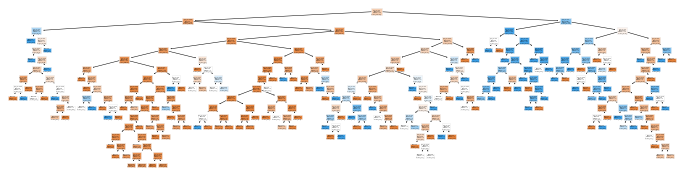

In [175]:
from sklearn import tree as t
t.plot_tree(tree, filled=True)

### Random Forest

In [89]:
from sklearn.ensemble import RandomForestClassifier

forest = RandomForestClassifier(random_state=1)
# forest.fit(X_train, y_train)
forestCV = GridSearchCV(estimator = forest, param_grid=param_grid, cv=7)
forestCV.fit(X_train, y_train) 
forest = forestCV

In [90]:
print(f"DECISION TREE ACCURACY SCORE (train) : {forest.score(X_train, y_train)*100:.2f}%") 
print(f"DECISION TREE ACCURACY SCORE (test) : {forest.score(X_test, y_test)*100:.2f}%")

DECISION TREE ACCURACY SCORE (train) : 84.13%
DECISION TREE ACCURACY SCORE (test) : 77.09%


In [173]:
X_train.shape

(712, 8)

### K-means

In [165]:
from sklearn.cluster import KMeans
import os
os.environ["OMP_NUM_THREADS"] = "3"
param_grid = {"tol":[1e-5, 1e-7, 1e-9], "algorithm" : ['elkan', "full"]}

kmeans = KMeans(n_clusters=2, random_state=1)
# kmeans.fit(X_train)
kmeansCV = GridSearchCV(estimator = kmeans, param_grid=param_grid, cv=7)
kmeansCV.fit(X_train, y_train) 
kmeans = kmeansCV

c:\Users\loulo\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(
c:\Users\loulo\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(
c:\Users\loulo\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(
c:\Users\loulo\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning: KMeans is known to have a memory leak on Window

In [164]:
accuracy_score(y_train, kmeans.labels_)

0.7893258426966292

In [168]:
kmeans.best_estimator_.cluster_centers_.shape

(2, 8)

In [172]:
kmeans.score(X_train)

-657.3990375367096

In [171]:
kmeans.best_estimator_.inertia_

657.3990375367096

### Hiérarchique

In [131]:
from sklearn.cluster import AgglomerativeClustering

clustering = AgglomerativeClustering()
clustering.fit(X_train)

AgglomerativeClustering()

In [132]:
accuracy_score(y_train,clustering.fit_predict(X_train, y_train))

0.7893258426966292

### Densité (DBSCAN)